# **ENGG680 - Introduction to Digital Engineering**
## *Lab Assignment 1: Using Git and Python for Collaborative Coding in Google Colab*

## Preliminary: Certificate of Work


*We, the undersigned, certify that this is our own work, which has been done expressly for this course, either without the assistance of any other party or where appropriate we have acknowledged the work of others. Further, we have read and understood the section in the university calendar on plagiarism/cheating/other academic misconduct and we are aware of the implications thereof. We request that the total mark for this assignment be distributed as follows among group members:*

|          | First Name | Last Name | Signature (Full Name, Date) | Hours | Contribution % |
|----------|------------|-----------|-----------------------------|-------|----------------|
| Member 1: | Daniel | Polania | Daniel Polania 2024-10-15 | 10 | 33.3% |
| Member 2: | Wutikeer | Tuerxun | Wutikeer Tuerxun 2024-10-15 | 10 | 33.3% |
| Member 3: | Mohammadamir | Zarpanahfard | Mohammadamir Zarpanahfard 2024-10-15 | 10 | 33.3% |


# **Linear LSE**
### (40 Marks)

### **Curve Fitting**

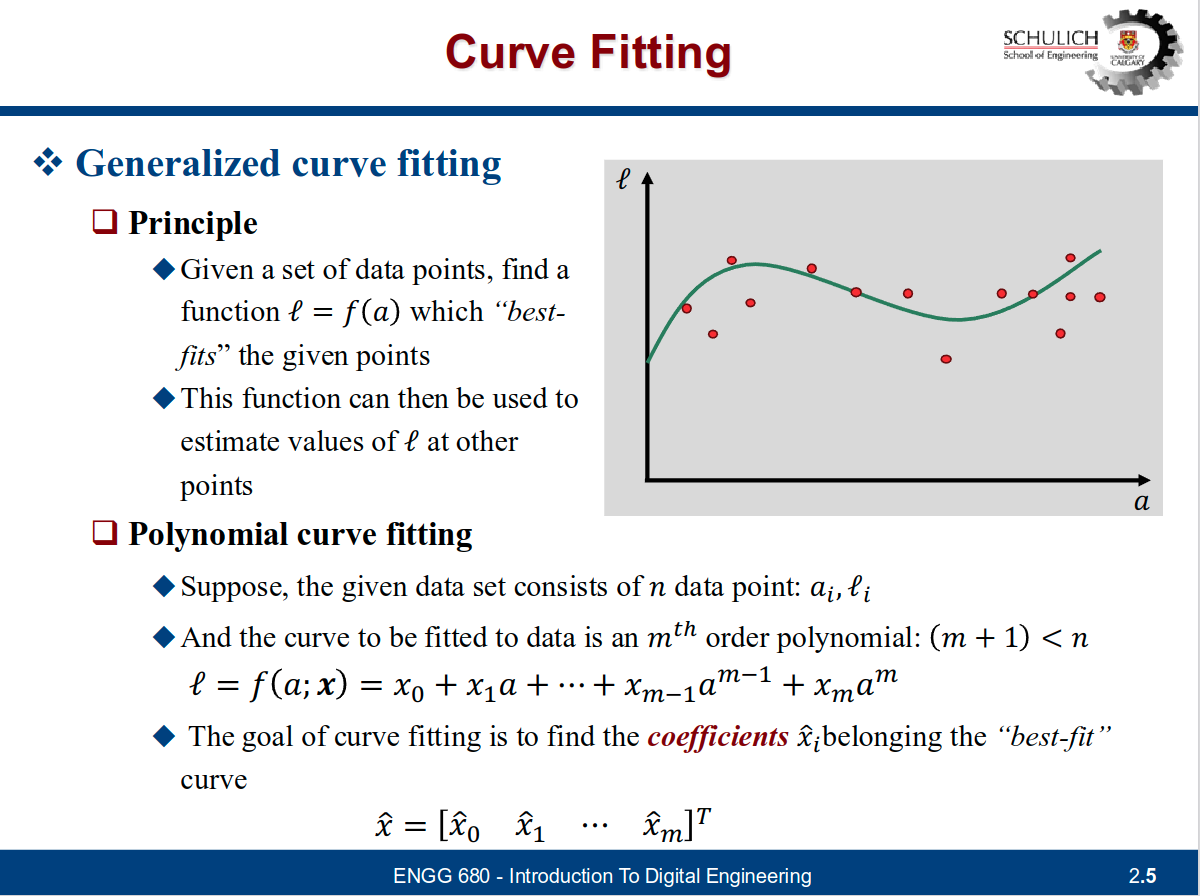

### **Observations:** values of a function f(a) in range of -π to π, contaminated with random noise

### **Unknown States:** coefficients of polynomial functions for curve fitting

In [ ]:
# step 1
# import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/engg680_2024_fall/Lab_Assigment2

/content/drive/MyDrive/engg680_2024_fall/Lab_Assigment2


In [ ]:
# step 2
# Load data.xlsx file, which contains the observations (with noise), variance of observations and true observations
# hint: use pandas library to parse excel file and use numpy library to convert it to array
# (1 mark)
df_data = pd.read_excel('data.xlsx')
arr_data = df_data.to_numpy()

#store the noisy observations, variance of observations and true observations into numpy arrays seperately
# (1 mark)
l = arr_data[:,0]
l_var = arr_data[:,1]
l_true = arr_data[:,2]


In [ ]:
# step 3
# define the number of observations n
# (1 mark)

n = len(l)
print(n)

# define the observation weight matrix P for LSE as identity matrix
# identity weight matrix simply means the observations will be unweighted in the following LSE
# (1 mark)
P = np.eye(n)
print(P)
# define the range of function input(i.e., constants a), from start to end; and the numerical array of a
start = -1* np.pi
end = np.pi
a = np.linspace(start, end, n)
print(a)

500
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
[-3.14159265 -3.1290011  -3.11640955 -3.10381799 -3.09122644 -3.07863488
 -3.06604333 -3.05345178 -3.04086022 -3.02826867 -3.01567712 -3.00308556
 -2.99049401 -2.97790246 -2.9653109  -2.95271935 -2.94012779 -2.92753624
 -2.91494469 -2.90235313 -2.88976158 -2.87717003 -2.86457847 -2.85198692
 -2.83939536 -2.82680381 -2.81421226 -2.8016207  -2.78902915 -2.7764376
 -2.76384604 -2.75125449 -2.73866293 -2.72607138 -2.71347983 -2.70088827
 -2.68829672 -2.67570517 -2.66311361 -2.65052206 -2.6379305  -2.62533895
 -2.6127474  -2.60015584 -2.58756429 -2.57497274 -2.56238118 -2.54978963
 -2.53719807 -2.52460652 -2.51201497 -2.49942341 -2.48683186 -2.47424031
 -2.46164875 -2.4490572  -2.43646565 -2.42387409 -2.41128254 -2.39869098
 -2.38609943 -2.37350788 -2.36091632 -2.34832477 -2.33573322 -2.32314166
 -2.31055011 -2.29795855 -2.285367   -

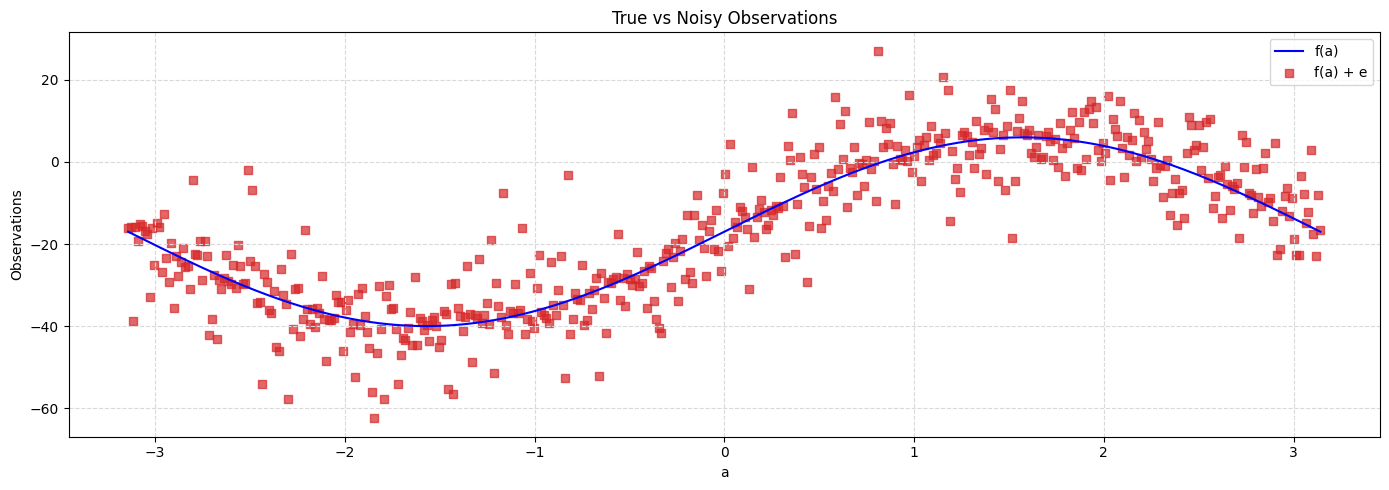

In [ ]:
# step 4
# use the matplotlib to plot the true and noisy observations together in one single figure
# use scatter for noisy observation plotting

# keep this format for the rest of the plots in this lab assignment
# (2 marks)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 5))
# for the true observation, label it as "f(a)"" and set color as 'k'
ax.plot(a, l_true, label='f(a)', color='blue')

# for the noisy observation scatter plot, label it as "f(a) + e", set color as 'tab:blue', set marker as 'o' and set alpha as 0.3
ax.scatter(a, l, label='f(a) + e', color='tab:red', marker='s', alpha=0.7)

# include proper axis labels, legend and title
ax.set_xlabel('a')
ax.set_ylabel('Observations')
ax.set_title('True vs Noisy Observations')

# scale the range of x-axis to be -1 to 1
#ax.set_xlim(-1, 1)  # Scale the range of x-axis
ax.legend()

ax.grid(True, which='major',ls='--',color='0.85')
fig.tight_layout()

In [ ]:
# step 5
# define a curve fitting function named fit_polynomial_curve
# the function should implement the linear least square estimation
# the function should include all important intermediate steps in LSE
# the input and output of the funciton are described in the comment below in red.
# please keep code clean and well-commented
# (9 marks)

def fit_polynomial_curve(a: np.ndarray, l: np.ndarray, P: np.ndarray, deg: int) -> tuple:
    '''
    Args:
        a:              function input (constants)
        l:              noisy observations
        P:              observation weight matrix
        deg:            degree of polynomial to fit to data
    Returns:
        x:              estimated polynomial coefficients
        cov_x:          uncertainty in estimated coefficients
        apv:            a posterier variance factor (goodness of fit)
        v:              observation residuals
    '''
    n = len(l)

    # Step 1: Construct the Vandermonde matrix for polynomial fitting
    #A = np.vander(a, deg + 1, increasing=True)

    A = np.zeros((n, degree + 1))  # Initialize the design matrix with zeros

    for i in range(n):

        for j in range(degree + 1):
            A[i, j] = a[i] ** j  # Fill in the design matrix

    # Step 2: Apply weights to the observations
    # The weighted observations and the weight matrix
    l_weighted = P @ l

    # Step 3: Perform the least squares estimation
    # Calculate the coefficients using the normal equation
    # (A^T * P * A) * x = A^T * P * l
    AtP = A.T @ P
    AtPA = AtP @ A
    AtPl = AtP @ l_weighted
    x = np.linalg.solve(AtPA, AtPl)

    # Step 4: Calculate the residuals
    # Calculate the fitted values
    l_fit = A @ x
    v = l - l_fit  # Residuals

    # Step 5: Calculate the a posteriori variance factor
    # Unweighted residual variance
    residual_variance = np.sum(v**2) / (n - (deg + 1))  # Adjusted for degrees of freedom
    apv = residual_variance

    # Step 6: Calculate the uncertainty in the estimated coefficients
    # Covariance matrix of the estimated coefficients
    cov_x = residual_variance * np.linalg.inv(AtPA)

    return (x, cov_x, apv, v)





In [ ]:
# step 6
# call the fit_polynomial_curve function and fetch the results
# use polynomial degrees of: 1, 3 ,5
# (1 marks)

degrees = [1,3,5]
#Initialize a list to store the results for each degree
results = []

# Call the fit_polynomial_curve function for each degree
for degree in degrees:
    # Fetch results for the current polynomial degree
    x, cov_x, apv, v = fit_polynomial_curve(a, l, P, degree)

    # Store the results in a dictionary for better organization
    results.append({
        'degree': degree,
        'coefficients': x,
        'covariance': cov_x,
        'posteriori_variance': apv,
        'residuals': v
    })

# Print the results for each polynomial degree
for result in results:
    print(f"Degree: {result['degree']}")
    print(f"Coefficients: {result['coefficients']}")
    print(f"Covariance of coefficients:\n{result['covariance']}")
    print(f"A posteriori variance factor: {result['posteriori_variance']}")
    print(f"Residuals:\n{result['residuals']}\n")


Degree: 1
Coefficients: [-16.59352348   7.25633807]
Covariance of coefficients:
[[3.25485217e-01 3.36083382e-17]
 [3.36083382e-17 9.85406897e-02]]
A posteriori variance factor: 162.74260860432202
Residuals:
[ 2.31950929e+01  2.33624696e+01  5.16650752e-01  2.33475847e+01
  1.96698387e+01  2.37681600e+01  2.33453696e+01  2.18331528e+01
  2.11355408e+01  5.61358715e+00  2.24756392e+01  1.33407067e+01
  2.34014210e+01  2.24034178e+01  1.13532794e+01  2.53650032e+01
  1.44202357e+01  8.52085442e+00  1.79247562e+01  2.11851700e+00
  1.46072683e+01  9.70673172e+00  1.30817824e+01  1.63166651e+01
  1.15688083e+01  1.16383392e+01  6.07754648e+00  3.24693889e+01
  1.42879391e+01  1.41679638e+01  1.73166729e+01  7.83535648e+00
  1.73215977e+01  1.35522578e+01 -5.87401633e+00 -2.04342770e+00
  8.45600371e+00 -7.17469845e+00  7.13670400e+00  4.93927812e+00
  7.53688443e+00  1.29373203e+01  6.55314295e+00  5.69877998e+00
  1.01514943e+01  4.53954123e+00  1.48752086e+01  9.72183415e+00
  5.32287382e

In [ ]:
# Assuming results contains the coefficients for each polynomial degree
line_uw = None
cubic_uw = None
quintic_uw = None

# Fetch coefficients for each degree
for result in results:
    deg = result['degree']
    x = result['coefficients']

    # Construct polynomial functions using np.polyval
    if deg == 1:
        line_uw = np.polyval(x[::-1], a)  # Reverse coefficients for np.polyval
    elif deg == 3:
        cubic_uw = np.polyval(x[::-1], a)  # Reverse coefficients for np.polyval
    elif deg == 5:
        quintic_uw = np.polyval(x[::-1], a)  # Reverse coefficients for np.polyval

Shape of line_uw: (500,)
Shape of cubic_uw: (500,)
Shape of quintic_uw: (500,)


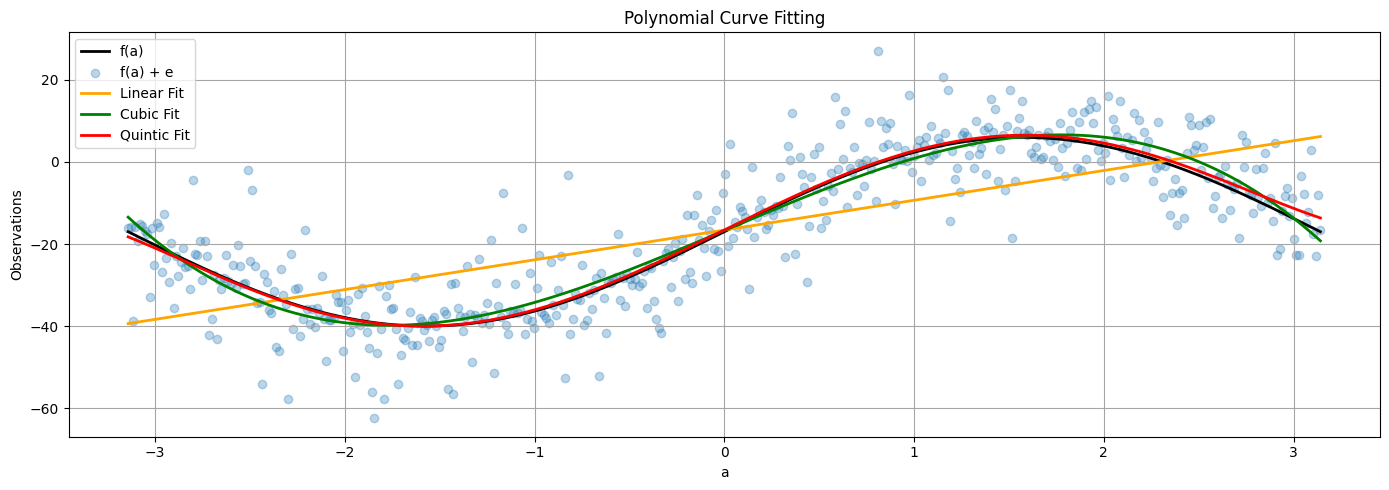

In [ ]:
# step 8
# use the matplotlib to plot each polynomial function, noisy observations l, true observations l_true, together in one single figure
# for the polynomials of line, cubic and quintic, use color of orange, green and red respectively.
# (2 marks)

# Check polynomial shapes
print("Shape of line_uw:", line_uw.shape)
print("Shape of cubic_uw:", cubic_uw.shape)
print("Shape of quintic_uw:", quintic_uw.shape)

# Proceed with plotting only if polynomial functions are correctly calculated
if line_uw.size > 0 and cubic_uw.size > 0 and quintic_uw.size > 0:
    # Create the figure and axis
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 5))

    # Plot the true observations
    ax.plot(a, l_true, label='f(a)', color='k', linewidth=2)

    # Plot the noisy observations
    ax.scatter(a, l, label='f(a) + e', color='tab:blue', marker='o', alpha=0.3)

    # Plot the polynomial functions
    ax.plot(a, line_uw, label='Linear Fit', color='orange', linewidth=2)
    ax.plot(a, cubic_uw, label='Cubic Fit', color='green', linewidth=2)
    ax.plot(a, quintic_uw, label='Quintic Fit', color='red', linewidth=2)

    # Add labels, title, and legend
    ax.set_xlabel('a')
    ax.set_ylabel('Observations')
    ax.set_title('Polynomial Curve Fitting')
    ax.legend()

    # Add grid
    ax.grid(True, which='both', ls='-', color='0.65')

    # Adjust layout
    fig.tight_layout()

    # Show the plot
    plt.show()
else:
    print("One or more polynomial fit arrays are empty.")


In [ ]:
# step 9
# print the a posterier variance factor for each polynomial function
# (3 marks)
for result in results:
    degree = result['degree']
    apv = result['posteriori_variance']
    print(f"A Posterior Variance Factor for degree {degree}: {apv:.4f}")


A Posterior Variance Factor for degree 1: 162.7426
A Posterior Variance Factor for degree 3: 66.1323
A Posterior Variance Factor for degree 5: 63.7583


In [ ]:
# step 10
# compute and print the norm between the predicted observations (output from each polynomial function) and the true observations
# (3 marks)
for result in results:
    degree = result['degree']

    # Get the predicted observations from the polynomial evaluation
    if degree == 1:
        predicted = line_uw
    elif degree == 3:
        predicted = cubic_uw
    elif degree == 5:
        predicted = quintic_uw

    # Compute the norm between the predicted observations and true observations
    norm_value = np.linalg.norm(predicted - l_true)

    # Print the norm value
    print(f"Norm between predicted observations and true observations for degree {degree}: {norm_value:.4f}")

Norm between predicted observations and true observations for degree 1: 229.0602
Norm between predicted observations and true observations for degree 3: 38.2860
Norm between predicted observations and true observations for degree 5: 17.3700


In [ ]:
# step 11
# comment on the results of a posterier variance factor and norm, what pattern do you observe
# (2 marks)
# The higher the degree the lower the varience and norm


In [ ]:
# step 12
# now, let's define the P matrix with the proper weights of observation
# use the variance of observation l_var, define P matrix
# (1 mark)
P = np.diag(1 / l_var)
print(P)


[[0.02777778 0.         0.         ... 0.         0.         0.        ]
 [0.         0.00694444 0.         ... 0.         0.         0.        ]
 [0.         0.         0.00591716 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.04       0.         0.        ]
 [0.         0.         0.         ... 0.         0.015625   0.        ]
 [0.         0.         0.         ... 0.         0.         0.25      ]]


Degree: 1
Coefficients: [-11.00183461   5.1245098 ]
Covariance of coefficients:
[[4.15086476 0.01630001]
 [0.01630001 1.38322016]]
A posteriori variance factor: 209.20681205761667
Residuals:
[ 1.09060680e+01  1.11002877e+01 -1.17186881e+01  1.11390889e+01
  7.48818595e+00  1.16133502e+01  1.12174029e+01  9.73202914e+00
  9.06126016e+00 -6.43385047e+00  1.04550446e+01  1.34695516e+00
  1.14345124e+01  1.04633523e+01 -5.59943062e-01  1.34786238e+01
  2.56069925e+00 -3.31183896e+00  6.11890588e+00 -9.66049032e+00
  2.85510403e+00 -2.01858954e+00  1.38330421e+00  4.64502989e+00
 -7.59838975e-02  2.03900268e-02 -5.51355963e+00  2.09051258e+01
  2.75051904e+00  2.65738681e+00  5.83293888e+00 -3.62153448e+00
  5.89154977e+00  2.14905287e+00 -1.72503782e+01 -1.33929465e+01
 -2.86667210e+00 -1.84705312e+01 -4.13228575e+00 -6.30286860e+00
 -3.67841926e+00  1.74885966e+00 -4.60847468e+00 -5.43599462e+00
 -9.56437264e-01 -6.54154731e+00  3.82096310e+00 -1.30556833e+00
 -5.67768563e+00 -5.59654624e

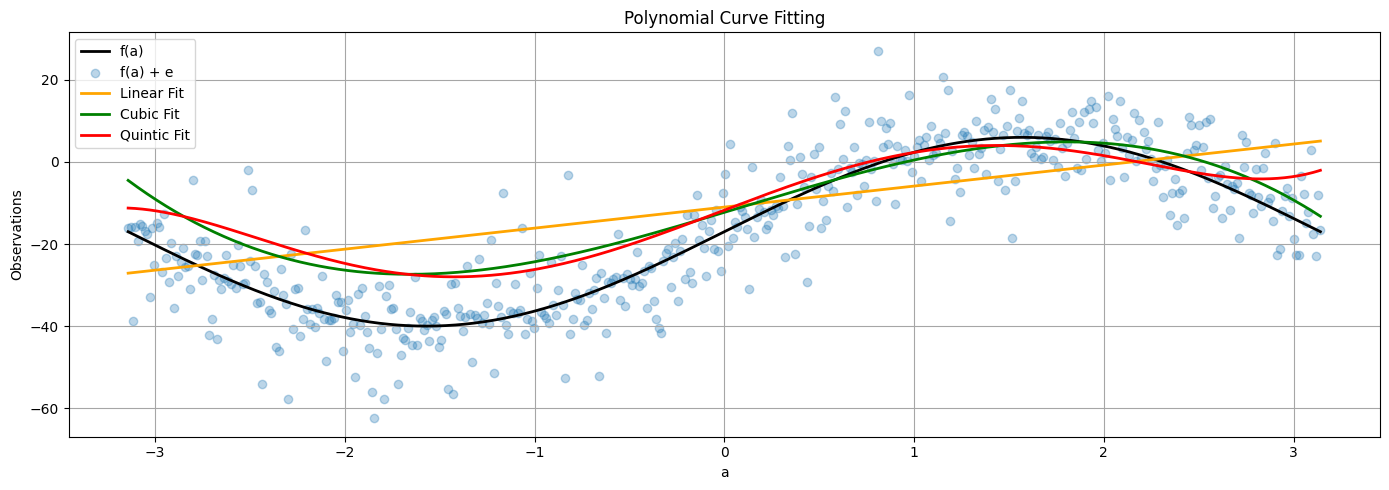

A Posterior Variance Factor for degree 1: 209.2068
A Posterior Variance Factor for degree 3: 124.8565
A Posterior Variance Factor for degree 5: 128.0723
Norm between predicted observations and true observations for degree 1: 275.1693
Norm between predicted observations and true observations for degree 3: 176.1811
Norm between predicted observations and true observations for degree 5: 181.2383


In [ ]:
# step 13
# repeat the steps 6-10, using the proper P matrix
# (10 marks)
#STEP 6
degrees = [1,3,5]
#Initialize a list to store the results for each degree
results = []

# Call the fit_polynomial_curve function for each degree
for degree in degrees:
    # Fetch results for the current polynomial degree
    x, cov_x, apv, v = fit_polynomial_curve(a, l, P, degree)

    # Store the results in a dictionary for better organization
    results.append({
        'degree': degree,
        'coefficients': x,
        'covariance': cov_x,
        'posteriori_variance': apv,
        'residuals': v
    })

# Print the results for each polynomial degree
for result in results:
    print(f"Degree: {result['degree']}")
    print(f"Coefficients: {result['coefficients']}")
    print(f"Covariance of coefficients:\n{result['covariance']}")
    print(f"A posteriori variance factor: {result['posteriori_variance']}")
    print(f"Residuals:\n{result['residuals']}\n")
#***STEP 7***
line_uw = None
cubic_uw = None
quintic_uw = None

# Fetch coefficients for each degree
for result in results:
    deg = result['degree']
    x = result['coefficients']

    # Construct polynomial functions using np.polyval
    if deg == 1:
        line_uw = np.polyval(x[::-1], a)  # Reverse coefficients for np.polyval
    elif deg == 3:
        cubic_uw = np.polyval(x[::-1], a)  # Reverse coefficients for np.polyval
    elif deg == 5:
        quintic_uw = np.polyval(x[::-1], a)  # Reverse coefficients for np.polyval

#STEP 8
# Check polynomial shapes
print("Shape of line_uw:", line_uw.shape)
print("Shape of cubic_uw:", cubic_uw.shape)
print("Shape of quintic_uw:", quintic_uw.shape)

# Proceed with plotting only if polynomial functions are correctly calculated
if line_uw.size > 0 and cubic_uw.size > 0 and quintic_uw.size > 0:
    # Create the figure and axis
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 5))

    # Plot the true observations
    ax.plot(a, l_true, label='f(a)', color='k', linewidth=2)

    # Plot the noisy observations
    ax.scatter(a, l, label='f(a) + e', color='tab:blue', marker='o', alpha=0.3)

    # Plot the polynomial functions
    ax.plot(a, line_uw, label='Linear Fit', color='orange', linewidth=2)
    ax.plot(a, cubic_uw, label='Cubic Fit', color='green', linewidth=2)
    ax.plot(a, quintic_uw, label='Quintic Fit', color='red', linewidth=2)

    # Add labels, title, and legend
    ax.set_xlabel('a')
    ax.set_ylabel('Observations')
    ax.set_title('Polynomial Curve Fitting')
    ax.legend()

    # Add grid
    ax.grid(True, which='both', ls='-', color='0.65')

    # Adjust layout
    fig.tight_layout()

    # Show the plot
    plt.show()
else:
    print("One or more polynomial fit arrays are empty.")

#STEP 9

# print the a posterier variance factor for each polynomial function
# (3 marks)
for result in results:
    degree = result['degree']
    apv = result['posteriori_variance']
    print(f"A Posterior Variance Factor for degree {degree}: {apv:.4f}")

#STEP 10
for result in results:
    degree = result['degree']

    # Get the predicted observations from the polynomial evaluation
    if degree == 1:
        predicted = line_uw
    elif degree == 3:
        predicted = cubic_uw
    elif degree == 5:
        predicted = quintic_uw

    # Compute the norm between the predicted observations and true observations
    norm_value = np.linalg.norm(predicted - l_true)

    # Print the norm value
    print(f"Norm between predicted observations and true observations for degree {degree}: {norm_value:.4f}")


In [ ]:
# step 14
# Compare the results of a posterier variance factor and norm from unweighted LSE and weighted LSE, what phenomena do you observe? Explain this phenomena.
# (2 marks)
%ls

 Volume in drive C is Windows
 Volume Serial Number is 904E-E7B3

 Directory of C:\Users\Daniel Polania\Downloads

2024-10-07  10:03 PM    <DIR>          .
2024-10-06  10:55 PM    <DIR>          ..
2024-10-06  10:39 PM    <DIR>          .ipynb_checkpoints
2024-09-11  01:07 PM           278,861 000012388548-118014751736.pdf
2024-09-16  03:51 PM            21,649 01-Object Oriented Programming.ipynb
2024-09-11  04:59 PM            14,919 03-Function Practice Exercises.ipynb
2024-09-14  01:26 PM            12,240 05-Lambda-Expressions-Map-and-Filter.ipynb
2024-10-06  06:28 PM         3,572,489 075.Ejiagha_et_al_Sensors-2022.pdf
2024-09-11  04:59 PM             8,671 08-Functions and Methods Homework.ipynb
2023-12-19  03:28 PM            51,036 150.pdf
2024-07-22  03:12 PM            58,916 2024072241213_12111955.pdf
2024-06-12  03:46 PM             2,259 30271057_Class_Calendar_GRAD_2247.ics
2024-09-11  11:12 AM            65,119 37674185 (1).pdf
2024-09-18  09:17 AM            65,119 376

# **Non-linear LSE**
### (35 Marks)

### **SinglePointPositioning**

### **Observations:** Pseudorange [m]

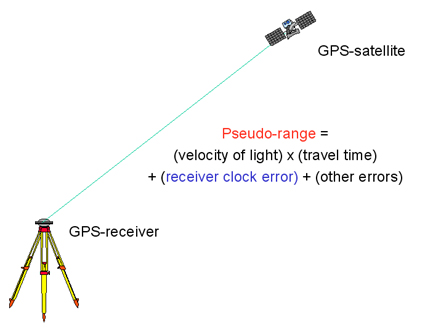

<font size="1.5">Image source: *ICA Course on Toponymy. https://unstats.un.org/unsd/geoinfo/ungegn/docs/_data_icacourses/_HtmlModules/_Selfstudy/S06/S06_05b.html.*</font>

**Pseudorange** is the *pseudo* distance between a satellite and a satellite signal receiver on the ground. In simple words, it contains the geometric range between the satellite and the receiver, with additional associated errors.

The simplified version of the Pseudorange measurement model is:
$$P=\rho-cdT+ϵ_{sum}$$ and
$$\rho=\sqrt{(x_s - x_r)^2 + (y_s - y_r)^2 + (z_s - z_r)^2}$$
where
$$\rho=geometric\ range$$
$${x_s, y_s, z_s, x_r,y_r,z_r} = 3D\ coordinates\ of\ satellite\ and\ receiver$$
$$cdT = receiver\ clock\ offset$$
$$ϵ_{sum}=general\ errors\ term\ (ϵ_{sum}=\Delta \rho + \Delta_{\text{ion}} + \Delta_{\text{trop}} + \epsilon_P + cdt)$$

\\
Note: the 3D **positions of satellites** are given in this assignment.

### **Unknown States:** Position of receiver & receiver clock offset

We use the psuedorange measurements to estimate the receiver's **3-dimensional position** and the **receiver clock offset:** $$X={x_r,y_r,z_r,cdT}$$.

These will be our states of interest, and we are going to estimate them in the following Least Square Estimation.

In [2]:
# step 1
# Load the psuedorange measurements and satellites' positions files, store them in the format of numpy array
# (hint: use pandas library to parse excel files into dataframe first, then convert them to numpy arrays)
# (1 marks)
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/engg680_2024_fall/Lab_Assignment2/
df_pseudorange = pd.read_excel('pseudoranges.xlsx')
df_sat_pos = pd.read_excel('satellite_position.xlsx')

pseudorange = df_pseudorange['P'].to_numpy()
sat_pos = df_sat_pos[['x', 'y', 'z']].to_numpy()

Mounted at /content/drive
/content/drive/MyDrive/engg680_2024_fall/Lab_Assignment2


In [3]:
# step 2
# define the number of measurements n and the number of states m
# (2 mark)
n = pseudorange.shape[0]
m = 4

In [6]:
# step 3
# Given that the variance of observation is 1 (m^2), define the weight matrix P
# (1 marks)
import numpy as np
import matplotlib.pyplot as plt
P = np.eye(n)

In [7]:
# step 4
# set the initial states as zeros:
# (1 mark)
x_0 = np.zeros(4)

In [8]:
# step 5
# GroundTruth coordiantes of the receiver
GroundTruth=np.array([-1633489.37967725,	-3651627.18250363,	4952481.61954918])

In [9]:
# step 6
# initialize the corrections array as ones, iteration loop counter i as zero and related arrays
# (2 mark)
delta = np.ones(4)
i = 0
arr_w = []
arr_delta=[]
arr_err_pos = []
arr_i = []
x_hat = x_0.copy()

In [10]:
# step 7
# define a function called euclidean_norm, which computes the geometric distances between satellites and receiver
# the input of the function should be two arrays: receiver_pos and satellite_pos
# the function should return an array of distance between satellites and receiver
# you can either use the numpy function or code the math manually
# (1 marks)
def euclidean_norm(receiver_pos, satellite_pos):
  diff = satellite_pos - receiver_pos
  distance = np.sqrt(np.sum(diff**2, axis=1))
  return distance

In [11]:
# step 8
# define a function named design_matrix which computes the design matrix A of this LSE problem
# the input of this funciton should be: estimated states array, satellites positions array and geometric distance array
# the function should return an two-dimensional array which represents the design matrix A
# (2 marks)
def design_matrix(r_pos, s_pos, rho):
  n_sats = s_pos.shape[0]
  A = np.zeros((n_sats, 4))
  for i in range(n_sats):
      A[i, 0] = (r_pos[0] - s_pos[i, 0]) / rho[i]
      A[i, 1] = (r_pos[1] - s_pos[i, 1]) / rho[i]
      A[i, 2] = (r_pos[2] - s_pos[i, 2]) / rho[i]
      A[i, 3] = -1
  return A

In [18]:
# step 9
# start the iteration for the LSE (11 marks in total)

# define the convergence criteria for the 'while' loop
# the convergence criteria is that the corrections delta are less than 0.001 (i.e., <0.1 m), for receiver's position x,y,z part
# (1 marks)


while np.linalg.norm(delta[:3]) >= 0.001:

       # compute the geometri distance between Satellites and receiver, using the euclidean_norm function we just defined
       # (1 marks)
       rho = euclidean_norm(x_hat[:3], sat_pos[:, :3])

       # compute the design matrix A
       # (1 marks)
       A = design_matrix(x_hat[:3], sat_pos, rho)

       # compute the misclosure array w
       # (1 marks)
       w = pseudorange - (rho - x_hat[3])

       # compute the corrections delta
       # (1 marks)
       lambda_reg = 1e-6
       I = np.eye(A.shape[1])
       delta = np.linalg.inv(A.T @ P @ A + lambda_reg * I) @ A.T @ P @ w

       # update the states
       # (1 marks)
       x_hat = x_hat + delta


       # compute the position error from using the updated states against groundtruth
       # (1 marks)
       err_pos = np.linalg.norm(x_hat[:3] - GroundTruth)


       # update the counter i, (i.e., increament of 1 for each iteration)
       # (1 mark)
       i += 1


       # store the misclosure, delta, position error and counter from each iteration into arrays, we will use them for plotting
       # (1 marks)
       arr_w.append(w)
       arr_delta.append(delta)
       arr_err_pos.append(err_pos)
       arr_i.append(i)




# After convergence, compute the A Posteriori Variance of Unit Weight
# (1 marks)
apv = (w.T @ P @ w) / (n - m)

# compute the Covariance matrix of estimated states
# (1 marks)
C_x_hat = np.linalg.inv(A.T @ P @ A + lambda_reg * I)





In [26]:
# step 10
"""
Print:
      {estimated states,
       corrections array,
       estimated measurements residuals,
       A posteriori Variance of Unit Weight,
       Covariance matrix of estimated states,
       number of iterations,
       3-D position errors},

after the LSE convergence to the console.
"""
# (7 marks)
estimated_rho = euclidean_norm(x_hat[:3], sat_pos[:, :3])
estimated_residuals = pseudorange - (estimated_rho - x_hat[3])
print("Estimated States (xr, yr, zr, cdT):")
print(x_hat)

print("\nCorrections Array (delta):")
print(delta)

print("\nEstimated Measurements Residuals (w):")
print(estimated_residuals)

print("\nA Posteriori Variance of Unit Weight (APV):")
print(apv)

print("\nCovariance Matrix of Estimated States:")
print(C_x_hat)

print("\nNumber of Iterations:")
print(i)

print("\n3-D Position Errors (in meters):")
print(err_pos)

Estimated States (xr, yr, zr, cdT):
[-1.63349244e+06 -3.65162954e+06  4.95248543e+06 -6.47201390e+00]

Corrections Array (delta):
[ 9.93343525e-06  3.68097964e-05 -1.08603649e-04  7.39497572e-05]

Estimated Measurements Residuals (w):
[ 0.25997571  0.11117279 -1.09950209 -0.00500055  0.20031684 -1.41815427
 -0.09126721  1.5120914   0.26365487  0.61138618 -0.34467368]

A Posteriori Variance of Unit Weight (APV):
0.8852888555075882

Covariance Matrix of Estimated States:
[[ 0.31964995  0.06966232 -0.08457169  0.07306862]
 [ 0.06966232  0.42546808 -0.58106963  0.36825754]
 [-0.08457169 -0.58106963  2.04559584 -1.10401742]
 [ 0.07306862  0.36825754 -1.10401742  0.69925552]]

Number of Iterations:
5

3-D Position Errors (in meters):
5.431614722145988


In [27]:
# step 11
# Comment on the computed A Posteriori Variance of Unit Weight value and the Covariance matrix of estimated states
# (2 marks)
# 1. The computed A Posteriori Variance of Unit Weight (APV) is 0.885, which is very close to 1. This indicates that the model fits the pseudorange measurements well,
# as the residual errors are slightly smaller than expected. An APV close to 1 suggests that the solution is reliable and that the estimation process has provided a good fit to the data.

# 2. The covariance matrix shows relatively low uncertainty for the horizontal position estimates (xr and yr), with variances of 0.3196 and 0.4255, respectively.
# However, there is a higher uncertainty in the vertical position estimate (zr), with a variance of 2.0456.
# This is typical in satellite-based positioning, where the vertical component is more difficult to estimate accurately.
# Overall, the covariance matrix indicates a reasonable level of confidence in the estimates, though the uncertainty in the vertical component could be reduced.

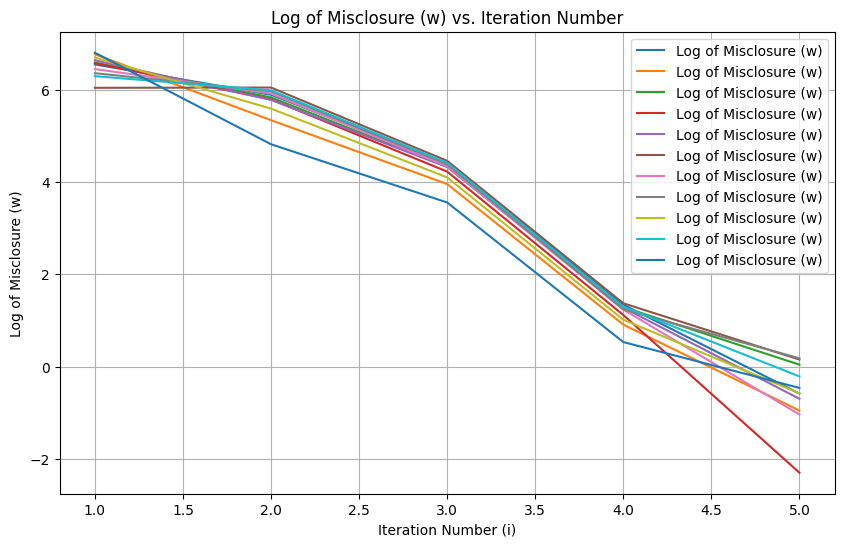

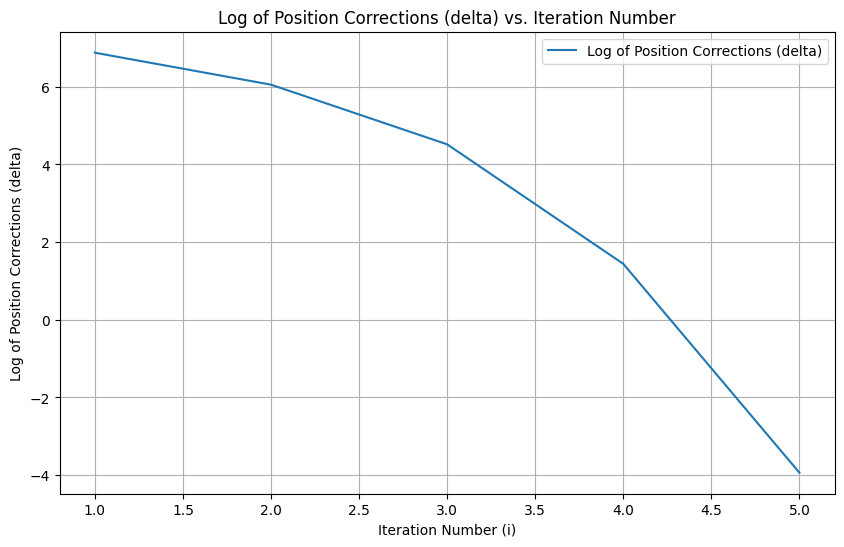

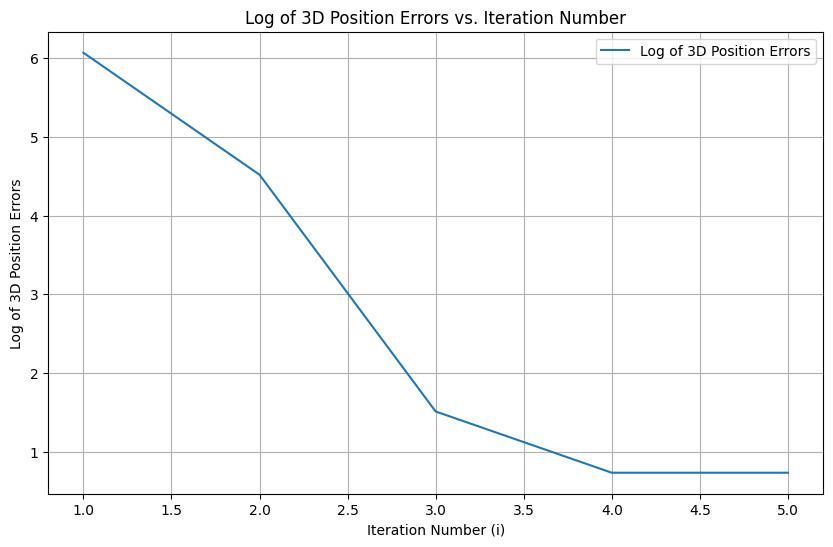

In [28]:
# step 12
# Using the imported matplotlib, plot the following (3 marks in total). Make sure to include proper axes information, legend, grid lines and title.
import numpy as np
import matplotlib.pyplot as plt
# 1. Plot log of the misclosure w against the LSQ iteration number i
# (1 marks)
plt.figure(figsize=(10, 6))
plt.plot(arr_i, np.log10(np.abs(arr_w)), label='Log of Misclosure (w)')
plt.xlabel('Iteration Number (i)')
plt.ylabel('Log of Misclosure (w)')
plt.title('Log of Misclosure (w) vs. Iteration Number')
plt.grid(True)
plt.legend()
plt.show()
# 2. Plot log of the corrections delta against the LSQ iteration number i
# (1 marks)
plt.figure(figsize=(10, 6))
plt.plot(arr_i, np.log10(np.linalg.norm(np.array(arr_delta)[:, :3], axis=1)), label='Log of Position Corrections (delta)')
plt.xlabel('Iteration Number (i)')
plt.ylabel('Log of Position Corrections (delta)')
plt.title('Log of Position Corrections (delta) vs. Iteration Number')
plt.grid(True)
plt.legend()
plt.show()
# 3. Plot log of the 3D position errors against the LSQ iteration number i
# (1 marks)
plt.figure(figsize=(10, 6))
plt.plot(arr_i, np.log10(np.abs(arr_err_pos)), label='Log of 3D Position Errors')
plt.xlabel('Iteration Number (i)')
plt.ylabel('Log of 3D Position Errors')
plt.title('Log of 3D Position Errors vs. Iteration Number')
plt.grid(True)
plt.legend()
plt.show()

In [29]:
# step 13
# Describe the phenomena or pattern you recognize for each plot, and explain such phenomena
# (2 marks)
# 1. All three plots show that the LSE algorithm is converging effectively.
# The misclosure (w), position corrections (delta), and position errors are all decreasing steadily with each iteration, eventually stabilizing at small values.
# 2. The process converged in approximately 5 iterations, which is a relatively quick convergence, indicating that the chosen initial states and the data quality are good.
# 3. The final 3D position error is low, suggesting that the estimated position is quite close to the true position.

In [30]:
# this is just for fun (no marks allocated)
# now you can estimated the receiver's position in Earth-center-earth-fixed (ECEF)
# you can use this tool: https://www.oc.nps.edu/oc2902w/coord/llhxyz.htm to convert it to latitude, longitude and height
# and find where is it on google earth!
# 51.07088, -114.10052 (Calgary)